Importations

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/TPS IN.xlsx')
df = df[df["TPS_DATA"]<5000000]
df = df[df["TPS_DATA"]>9000]
print(df)

         DATES   TPS_GY  TPS_VOIX  TPS_DATA   TPS_GX
0   2022-09-01  3010.78    241.62  10374.80  7437.09
1   2022-09-02  2992.76    236.62  10434.49  7472.11
2   2022-09-03  2964.51    229.12  10504.89  7546.87
3   2022-09-04  2881.29    211.75  10417.56  7573.19
4   2022-09-05  3034.04    246.72  10166.35  7248.81
..         ...      ...       ...       ...      ...
360 2023-08-27  3148.25    548.00  11994.57  8846.14
361 2023-08-28  3305.87    609.99  11666.41  8405.65
362 2023-08-29  3361.10    612.92  11633.87  8323.49
363 2023-08-30  3256.79    601.13  11401.80  8239.63
364 2023-08-31  3310.27    599.33  11511.52  8244.07

[299 rows x 5 columns]


In [ ]:
df.isnull().any()

DATES       False
TPS_GY      False
TPS_VOIX     True
TPS_DATA    False
TPS_GX      False
dtype: bool

In [ ]:
columns = df.columns.to_list()
print(columns)

['DATES', 'TPS_GY', 'TPS_VOIX', 'TPS_DATA', 'TPS_GX']


In [ ]:
Dates = df['DATES'].to_list()
TPS_GY = df['TPS_GY'].to_list()
TPS_GX = df['TPS_GX'].to_list()
TPS_VOIX = df['TPS_VOIX'].to_list()
TPS_DATA = df['TPS_DATA'].to_list()
print(TPS_DATA)

[10374.8, 10434.49, 10504.89, 10417.56, 10166.35, 10219.76, 10249.28, 10199.15, 10158.17, 10369.92, 10106.14, 10129.94, 10116.02, 10149.31, 10074.77, 10103.67, 9916.04, 9705.61, 10103.2, 9929.11, 10070.1, 10103.64, 9921.47, 9824.56, 9475.14, 9959.62, 10022.92, 9744.19, 9919.17, 9865.09, 10241.37, 9849.48, 10405.32, 10493.71, 10545.53, 10604.33, 10736.19, 10181.54, 10013.95, 10363.73, 10547.66, 10450.17, 10407.53, 10534.46, 10131.25, 9924.98, 10271.18, 10093.98, 9997.35, 10334.39, 10101.2, 9817.86, 9464.08, 10075.22, 10105.44, 10114.72, 10119.05, 10094.91, 9811.68, 9702.18, 9942.6, 10531.3, 10491.93, 10543.84, 10583.7, 9932.24, 9587.55, 10327.04, 10349.47, 10299.8, 10306.86, 10347.01, 9975.07, 9605.65, 10336.33, 10343.14, 10313.35, 11262.6, 9868.46, 9333.98, 7402.17, 2326.63, 2962.07, 10787.4, 10578.29, 10194.38, 9882.13, 10580.93, 10823.49, 10408.59, 10393.93, 13005.83, 10868.92, 9417.69, 10118.2, 10189.04, 10293.88, 10429.38, 10353.44, 10399.56, 10195.47, 10036.79, 10108.73, 10234.45,

In [ ]:
DATA = df[['DATES','TPS_DATA']]
DATA

,DATES,TPS_DATA
0,2022-09-01,10374.80
1,2022-09-02,10434.49
2,2022-09-03,10504.89
3,2022-09-04,10417.56
4,2022-09-05,10166.35
...,...,...
360,2023-08-27,11994.57
361,2023-08-28,11666.41
362,2023-08-29,11633.87
363,2023-08-30,11401.80


In [ ]:
DATA.dropna(inplace= True)
DATA.isnull().any()

<ipython-input-190-017ee131cb01>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DATA.dropna(inplace= True)


DATES       False
TPS_DATA    False
dtype: bool

Text(0, 0.5, 'TPS_DATA')

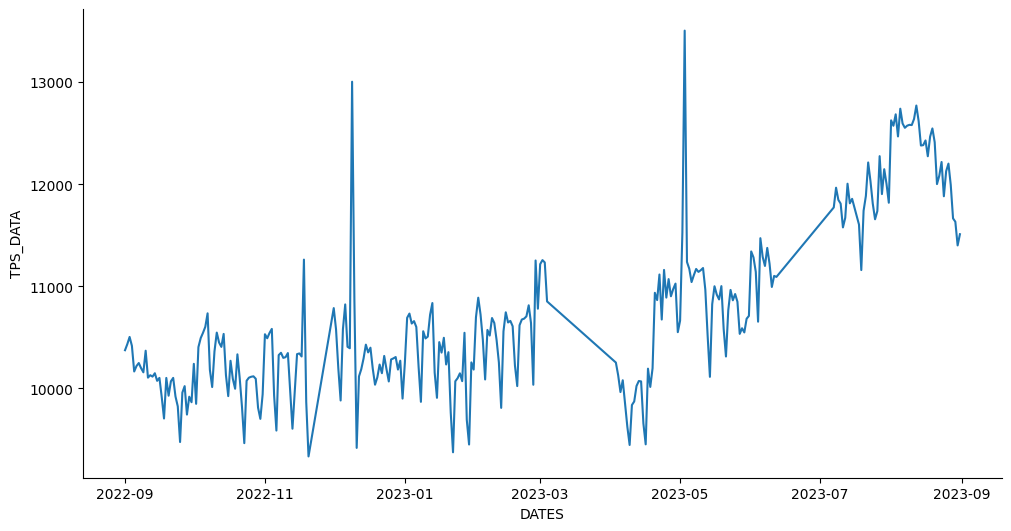

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  xs = series['DATES']
  ys = series['TPS_DATA']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = DATA.sort_values('DATES', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATES')
plt.ylabel('TPS_DATA')

In [ ]:
train_percentage = 0.8
train_size = int(len(DATA) * train_percentage)

# Split the data into train and test sets
train_data = DATA.iloc[:train_size]
test_data = DATA.iloc[train_size:]

In [ ]:
train_data.columns=['ds', 'y']
test_data.columns=['ds', 'y']

In [ ]:
!pip install prophet

In [ ]:
holidays = pd.read_csv("holidays.csv")
model = Prophet(growth='linear',
                     #changepoints=None,

                        n_changepoints=4,
                     changepoint_range=0.9,
                     #yearly_seasonality=True,
                     #weekly_seasonality=True,
                     #monthly_seasonality=True,
                     holidays=holidays,
                     seasonality_mode='additive',
                     seasonality_prior_scale=0.8,
                     holidays_prior_scale=1.0,
                     changepoint_prior_scale=0.1,
                     mcmc_samples=0,
                     interval_width=0.8,
                     uncertainty_samples=1000,
                     stan_backend=None
)
model.add_seasonality(name='monthly', period=30.5, fourier_order=1)
model.fit(train_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr1tecxq/8_k57r6r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr1tecxq/9b1xyu96.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=76756', 'data', 'file=/tmp/tmptr1tecxq/8_k57r6r.json', 'init=/tmp/tmptr1tecxq/9b1xyu96.json', 'output', 'file=/tmp/tmptr1tecxq/prophet_model_l466zi6/prophet_model-20231229112203.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:22:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:22:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
test_forecast = model.predict(test_data[['ds']])
test_predictions = test_forecast[['yhat']]
actual_values = test_data['y'].values

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(actual_values, test_predictions)
mse = mean_squared_error(actual_values, test_predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 936.8874523516354
Mean Squared Error (MSE): 1131405.617111892
Root Mean Squared Error (RMSE): 1063.675522474731


In [ ]:
start_date = '2023-09-01'
end_date = pd.to_datetime(start_date) + pd.DateOffset(months=3) - pd.DateOffset(days=1)
date_range = pd.date_range(start=start_date, end=end_date, freq='D')
future = pd.DataFrame({'ds': date_range})
print(future)

           ds
0  2023-09-01
1  2023-09-02
2  2023-09-03
3  2023-09-04
4  2023-09-05
..        ...
86 2023-11-26
87 2023-11-27
88 2023-11-28
89 2023-11-29
90 2023-11-30

[91 rows x 1 columns]


In [ ]:
future = model.make_future_dataframe(periods=365)
future.tail()

,ds
599,2024-06-01
600,2024-06-02
601,2024-06-03
602,2024-06-04
603,2024-06-05


In [ ]:
forecast = model.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds          yhat    yhat_lower    yhat_upper
599 2024-06-01  11347.584509  10029.676424  12760.704635
600 2024-06-02  11084.094168   9774.865215  12527.825565
601 2024-06-03  11588.926848  10248.929498  13083.224736
602 2024-06-04  11668.457521  10344.575917  13195.989921
603 2024-06-05  11779.605093  10397.030155  13312.629524


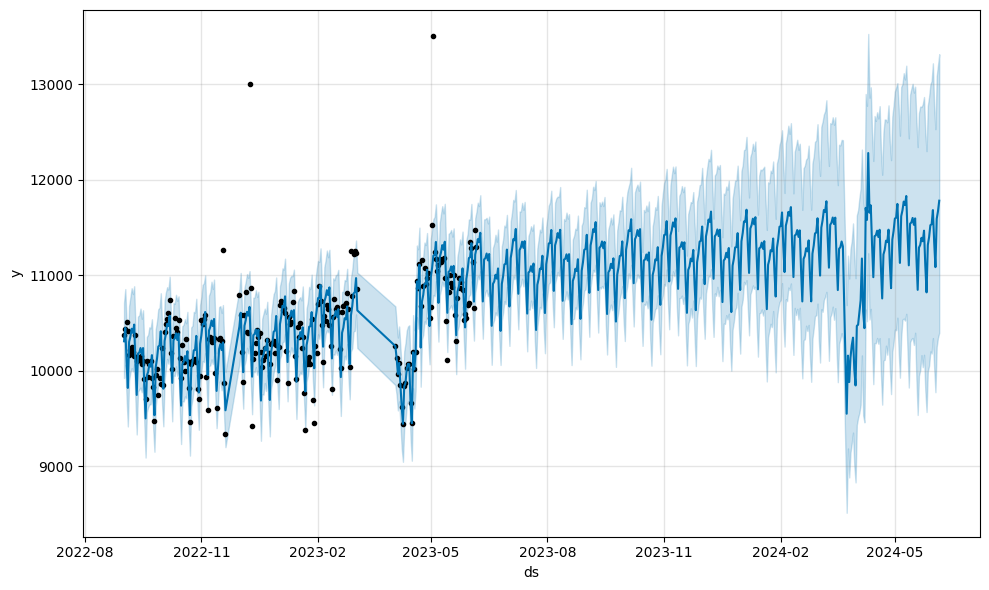

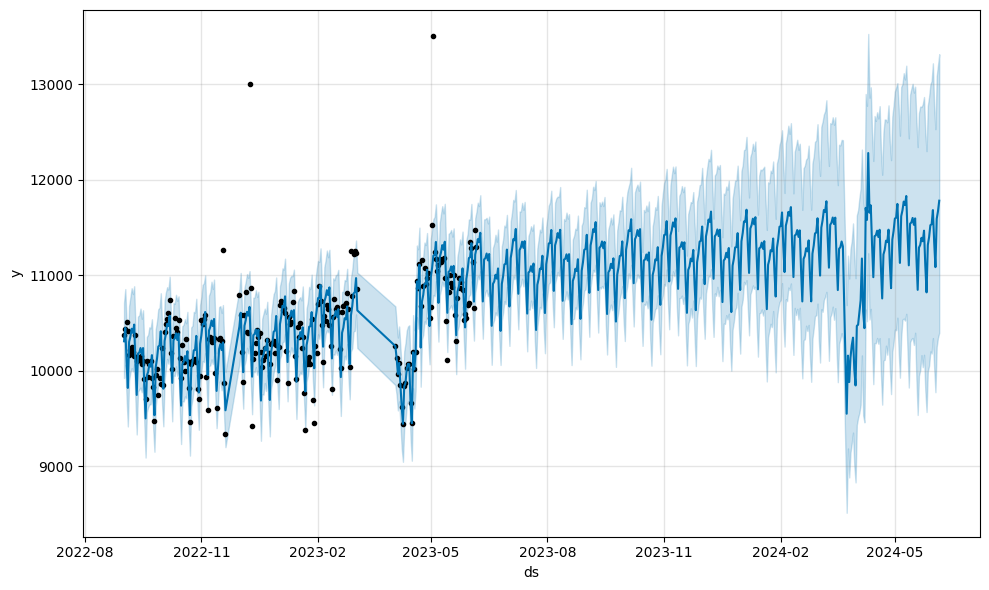

In [ ]:
model.plot(forecast)

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-09-01,10050.911871,8899.372636,12709.022989,10050.911871,10050.911871,891.349529,891.349529,891.349529,606.782615,606.782615,606.782615,284.566914,284.566914,284.566914,0.0,0.0,0.0,10942.261400
1,2022-09-02,10051.553290,8907.142446,12515.976620,10051.553290,10051.553290,585.857921,585.857921,585.857921,483.204272,483.204272,483.204272,102.653649,102.653649,102.653649,0.0,0.0,0.0,10637.411211
2,2022-09-03,10052.194709,8272.204343,12115.080228,10052.194709,10052.194709,202.350788,202.350788,202.350788,158.854233,158.854233,158.854233,43.496555,43.496555,43.496555,0.0,0.0,0.0,10254.545497
3,2022-09-04,10052.836128,7905.313872,11463.482017,10052.836128,10052.836128,-459.320715,-459.320715,-459.320715,-160.716580,-160.716580,-160.716580,-298.604135,-298.604135,-298.604135,0.0,0.0,0.0,9593.515413
4,2022-09-05,10053.477547,7788.661797,11209.419277,10053.477547,10053.477547,-559.313886,-559.313886,-559.313886,-316.129965,-316.129965,-316.129965,-243.183921,-243.183921,-243.183921,0.0,0.0,0.0,9494.163661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623,2024-06-19,10473.481483,8791.559563,12324.813965,10473.282035,10473.688378,156.733635,156.733635,156.733635,115.754080,115.754080,115.754080,40.979555,40.979555,40.979555,0.0,0.0,0.0,10630.215119
624,2024-06-20,10474.125271,8959.836192,12467.297606,10473.925458,10474.332527,345.458258,345.458258,345.458258,60.891344,60.891344,60.891344,284.566914,284.566914,284.566914,0.0,0.0,0.0,10819.583529
625,2024-06-21,10474.769059,8711.140727,12284.558484,10474.568880,10474.976401,-85.319826,-85.319826,-85.319826,-187.973475,-187.973475,-187.973475,102.653649,102.653649,102.653649,0.0,0.0,0.0,10389.449233
626,2024-06-22,10475.412846,8276.019194,11816.854436,10475.212184,10475.621157,-423.002345,-423.002345,-423.002345,-466.498900,-466.498900,-466.498900,43.496555,43.496555,43.496555,0.0,0.0,0.0,10052.410501


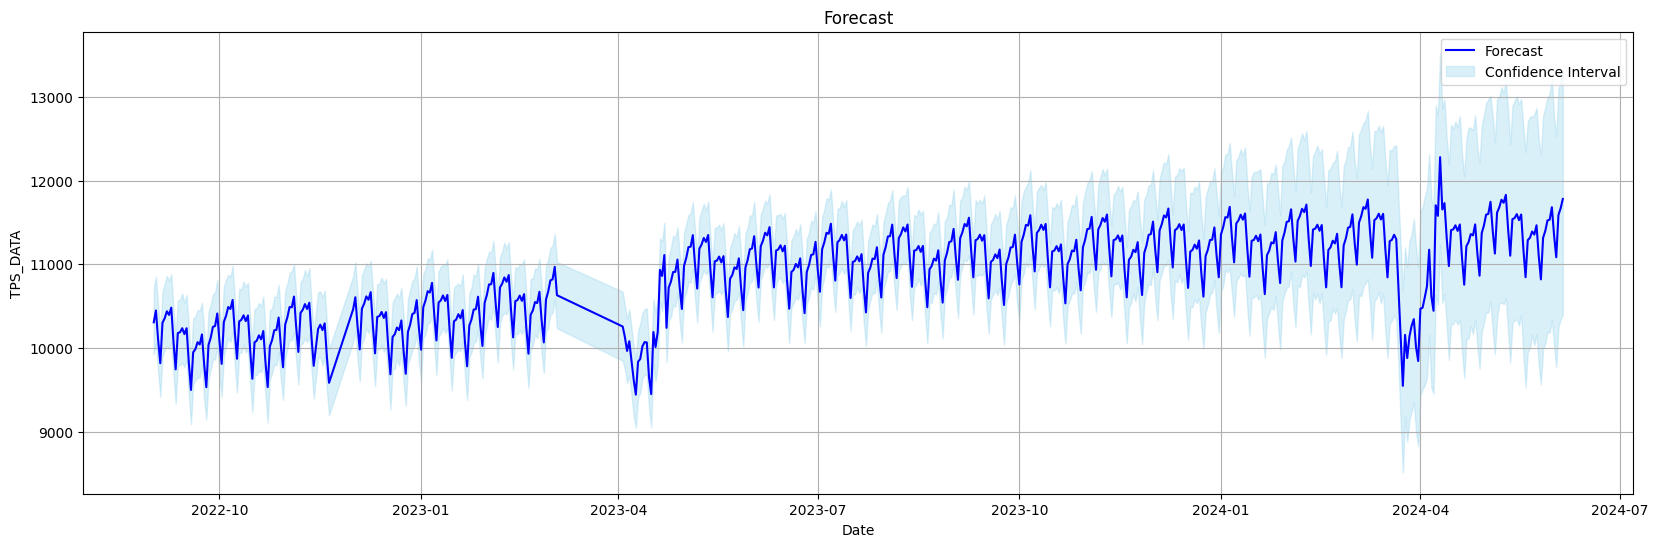

In [ ]:
date_range = forecast['ds']
forecasted_values = forecast['yhat']
lower_bound = forecast['yhat_lower']
upper_bound = forecast['yhat_upper']
plt.figure(figsize=(20, 6))
plt.plot(date_range, forecasted_values, label='Forecast', color='blue')
plt.fill_between(date_range, lower_bound, upper_bound, color='skyblue', alpha=0.3, label='Confidence Interval')
#plt.plot(DATA['DATES'], DATA['TPS_DATA'])
plt.xlabel('Date')
plt.ylabel('TPS_DATA')
plt.title('Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_excel('/content/TPS IN.xlsx')
df = df.iloc[104:]
voix = df[['DATES','TPS_VOIX']]
voix.dropna(inplace= True)

<ipython-input-48-a94c752dc3eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voix.dropna(inplace= True)


Text(0, 0.5, 'TPS_VOIX')

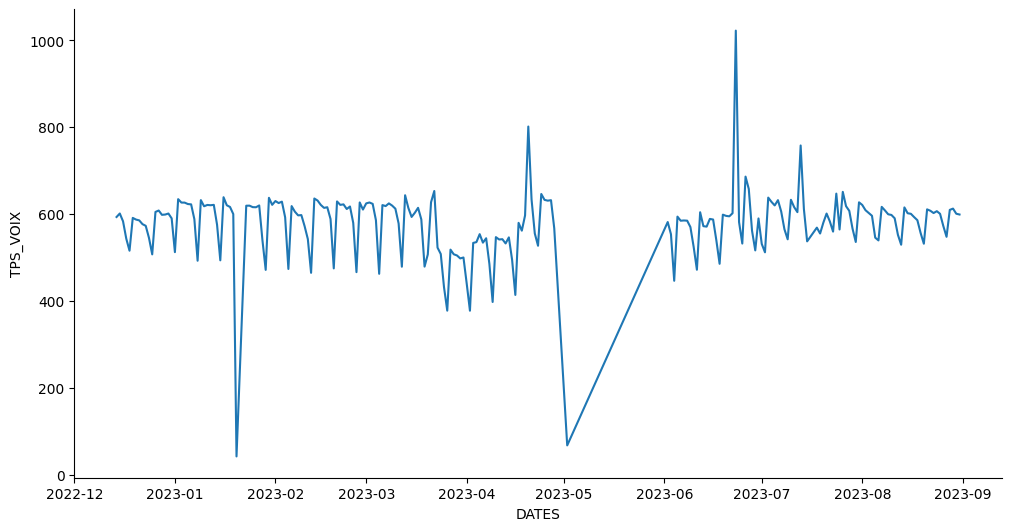

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  xs = series['DATES']
  ys = series['TPS_VOIX']

  plt.plot(xs, ys, label=series_name)

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = voix.sort_values('DATES', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DATES')
plt.ylabel('TPS_VOIX')

In [ ]:
train_percentage = 0.8
train_size = int(len(voix) * train_percentage)
train_voix = voix.iloc[:train_size]
test_voix = voix.iloc[train_size:]

In [ ]:
train_voix.columns=['ds', 'y']
test_voix.columns=['ds', 'y']

In [ ]:
holidays = pd.read_csv("holidays.csv")
vmodel = Prophet(growth='linear',
                     #changepoints=None,

                        n_changepoints=4,
                     changepoint_range=0.9,
                     #yearly_seasonality=True,
                     #weekly_seasonality=True,
                     #monthly_seasonality=True,
                     holidays=holidays,
                     seasonality_mode='additive',
                     seasonality_prior_scale=0.5,
                     holidays_prior_scale=1.0,
                     changepoint_prior_scale=0.1,
                     mcmc_samples=0,
                     interval_width=0.5,
                     uncertainty_samples=1000,
                     stan_backend=None
)
vmodel.add_seasonality(name='weekly', period=7, fourier_order=7)
vmodel.fit(train_voix)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr1tecxq/uc6rj5ti.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptr1tecxq/0ddu4syx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85672', 'data', 'file=/tmp/tmptr1tecxq/uc6rj5ti.json', 'init=/tmp/tmptr1tecxq/0ddu4syx.json', 'output', 'file=/tmp/tmptr1tecxq/prophet_modelfd7zpys1/prophet_model-20231229105743.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:57:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:57:43 - cmdstanpy - INFO - Chain [1] do

In [ ]:
test_forecast = vmodel.predict(test_voix[['ds']])
test_predictions = test_forecast[['yhat']]
actual_values = test_voix['y'].values

In [ ]:
mae = mean_absolute_error(actual_values, test_predictions)
mse = mean_squared_error(actual_values, test_predictions)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 18.702210112439104
Mean Squared Error (MSE): 647.7993605190163
Root Mean Squared Error (RMSE): 25.451902886012597


In [ ]:
forecast = vmodel.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
539 2024-07-10  623.982892  574.773851  667.589067
540 2024-07-11  634.513163  583.584038  689.964743
541 2024-07-12  591.802678  540.106545  638.941187
542 2024-07-13  726.893952  680.729837  772.784566
543 2024-07-14  507.831756  463.314931  561.570908


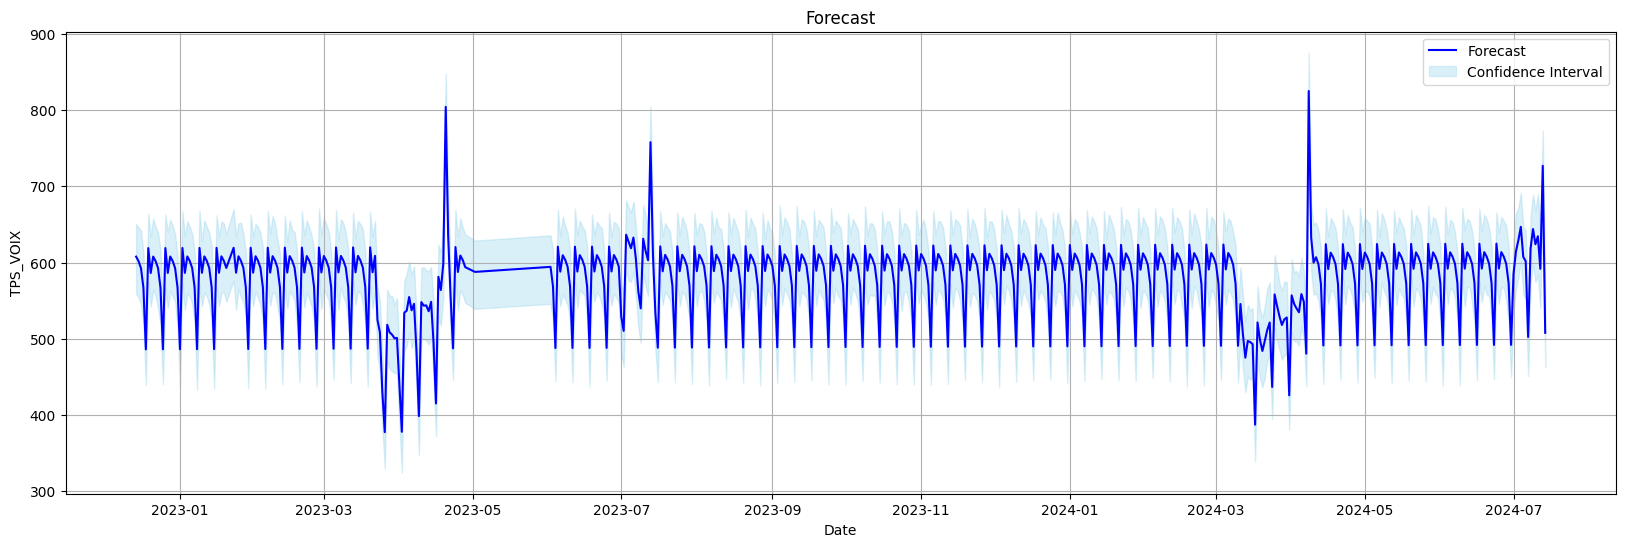

In [ ]:
date_range = forecast['ds']
forecasted_values = forecast['yhat']
lower_bound = forecast['yhat_lower']
upper_bound = forecast['yhat_upper']
plt.figure(figsize=(20, 6))
plt.plot(date_range, forecasted_values, label='Forecast', color='blue')
plt.fill_between(date_range, lower_bound, upper_bound, color='skyblue', alpha=0.3, label='Confidence Interval')
#plt.plot(voix['DATES'],voix['TPS_VOIX'])
plt.xlabel('Date')
plt.ylabel('TPS_VOIX')
plt.title('Forecast')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
future = vmodel.make_future_dataframe(periods=365)

In [ ]:
forecast = vmodel.predict(future)
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

            ds        yhat  yhat_lower  yhat_upper
539 2024-07-10  623.982892  576.947344  670.531222
540 2024-07-11  634.513163  584.518971  680.335093
541 2024-07-12  591.802678  547.917909  639.941317
542 2024-07-13  726.893952  678.020847  773.584134
543 2024-07-14  507.831756  467.614657  557.273354


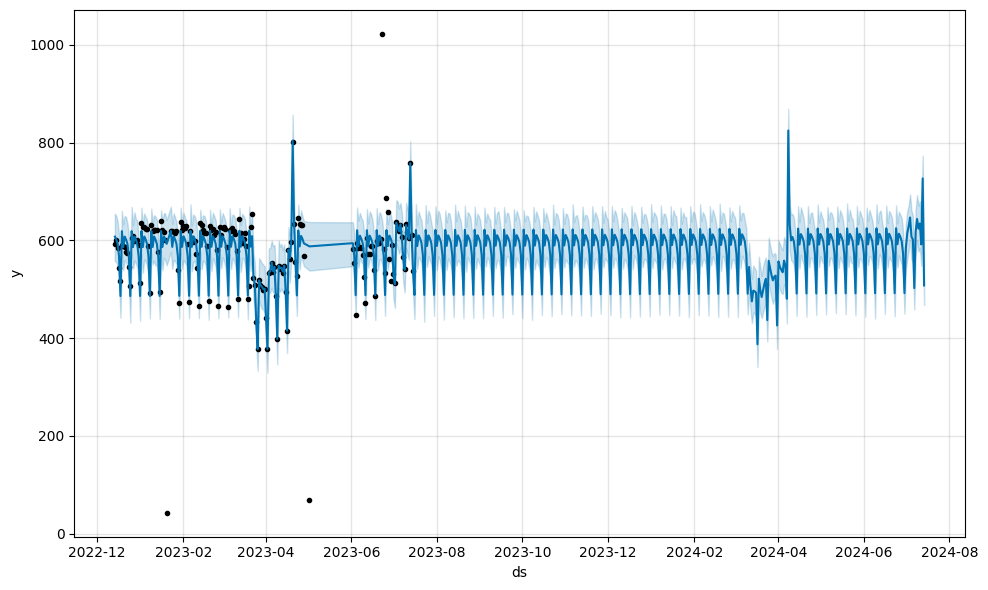

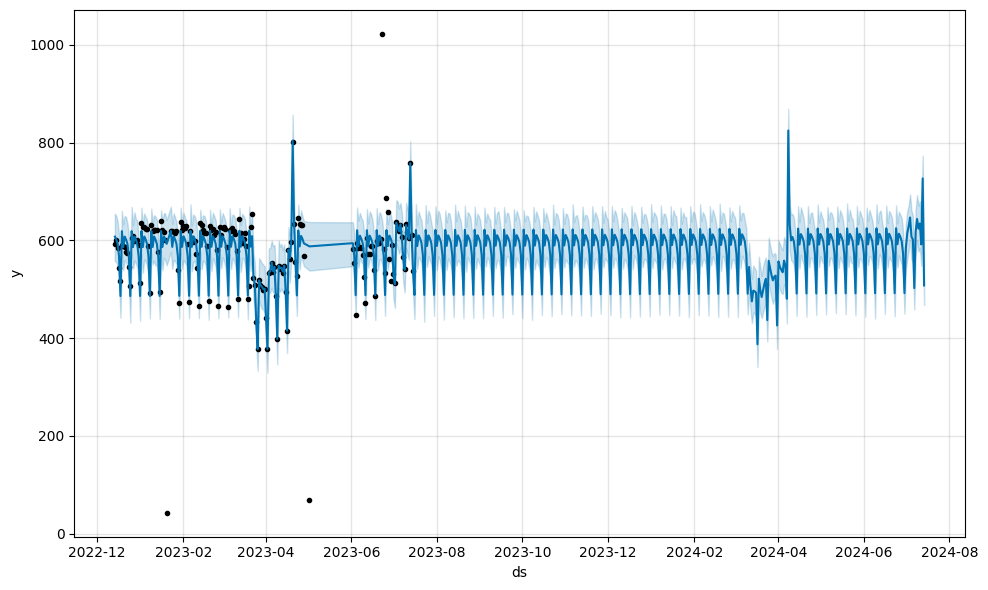

In [ ]:
vmodel.plot(forecast)